# **Decision Tree Assignment:**

## **Exploratory Data Analysis (EDA):**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Check for sheet names in excel file
sheet_names = pd.ExcelFile('/content/heart_disease.xlsx').sheet_names
print(sheet_names)

['Description', 'Heart_disease']


In [ ]:
#Load the data
data = pd.read_excel('/content/heart_disease.xlsx', sheet_name='Heart_disease')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,reversable defect,4


In [ ]:
data.shape

(908, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
#Statistical summery
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
#Check for null values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
#Handle the null values
data['oldpeak']=data['oldpeak'].fillna(data['oldpeak'].mean())
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


**Histogram:**

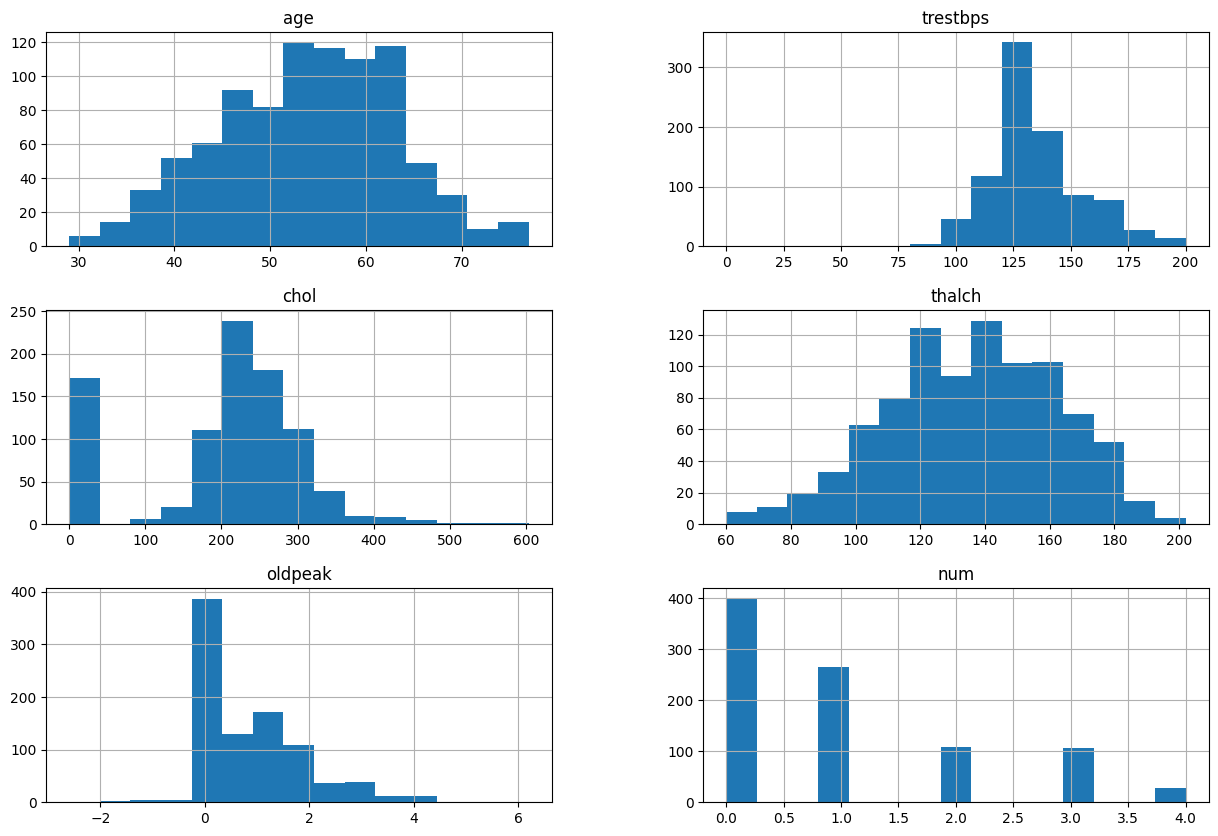

In [ ]:
# Histograms for each numeric feature
data.hist(bins=15, figsize=(15, 10))
plt.show()

**Box Plot:**

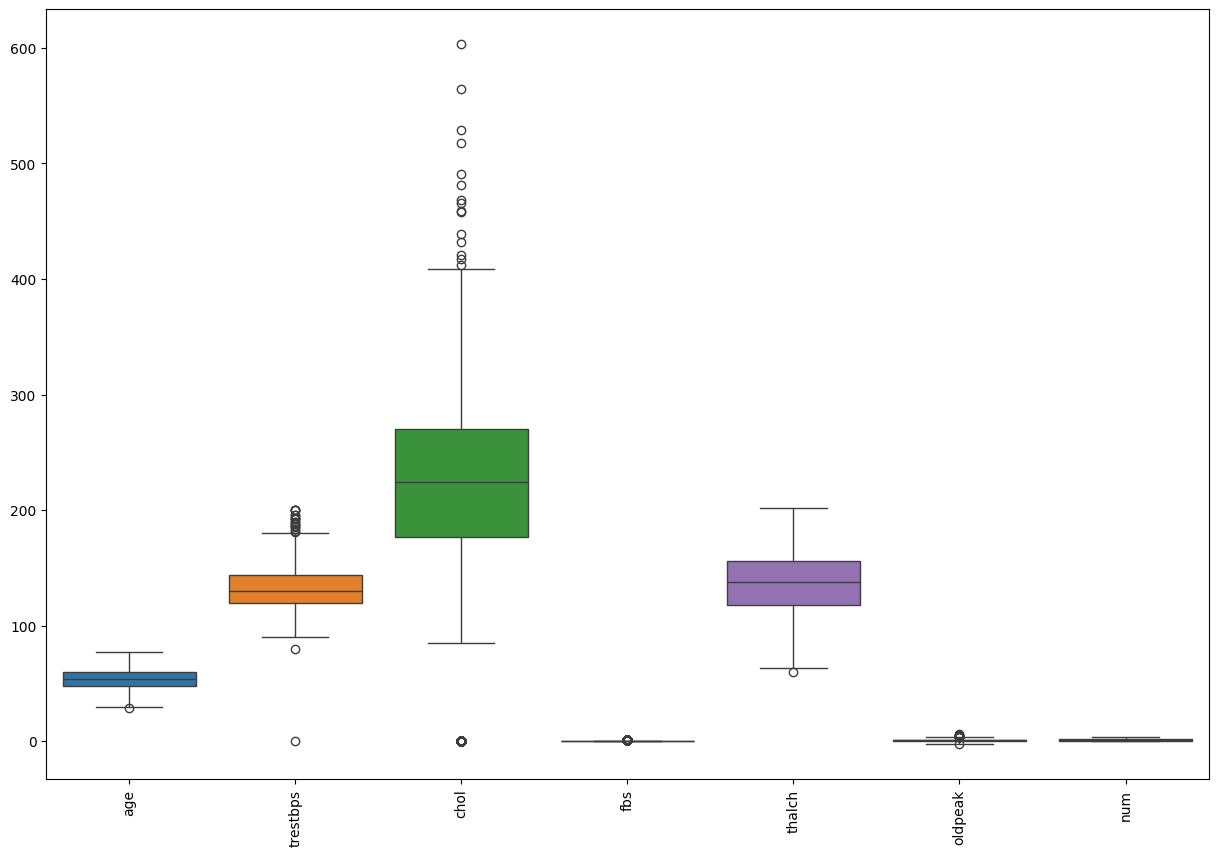

In [ ]:
# Box plots to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

**Heat Map:**

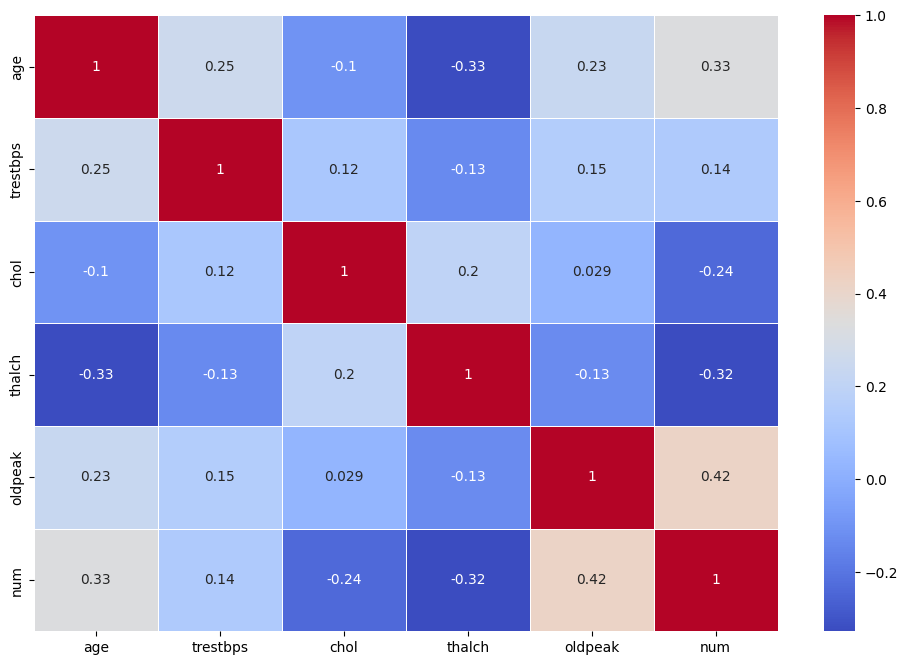

In [ ]:
# Correlation matrix to check relationships between numeric features
# Select only numeric columns
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = data_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


## **Feature Engineering:**

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)
print(data.head())


   age  trestbps  chol    fbs  thalch  oldpeak  num  sex_Male  \
0   63       145   233   True     150      2.3    0      True   
1   41       135   203  False     132      0.0    0      True   
2   57       140   192  False     148      0.4    0      True   
3   52       118   186  False     190      0.0    0      True   
4   57       110   201  False     126      1.5    0      True   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0               False           False               True           False   
1                True           False              False            True   
2               False           False              False            True   
3               False           False               True           False   
4               False           False              False            True   

   restecg_st-t abnormality  exang_True  exang_FALSE  exang_TURE  slope_flat  \
0                     False       False        False       False       F

**Scaling numerical features:**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the numerical features
scaler = StandardScaler()
numerical_features = ['trestbps','chol','thalch','oldpeak']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

## **Decision Tree Classification:**

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('num', axis=1)  # Replace 'target' with the actual target column name
y = data['num']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Implement a Decision Tree Classification model:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.71      0.71        89
           1       0.38      0.44      0.40        48
           2       0.29      0.18      0.22        22
           3       0.23      0.29      0.26        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.50      0.51      0.51       182

Accuracy: 0.510989010989011


## **Hyperparameter Tuning:**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and values to test
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with the Decision Tree model
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Retrain the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)



Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best cross-validation score: 0.5592347661785546


## **Model Evaluation and Analysis:**

In [ ]:
# Evaluate the tuned model
print(classification_report(y_test, y_pred_best))
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.70      0.84      0.77        89
           1       0.39      0.54      0.46        48
           2       0.00      0.00      0.00        22
           3       0.22      0.12      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.26      0.30      0.28       182
weighted avg       0.47      0.57      0.51       182

Tuned Accuracy: 0.5659340659340659


**Visualize the decision tree structure:**

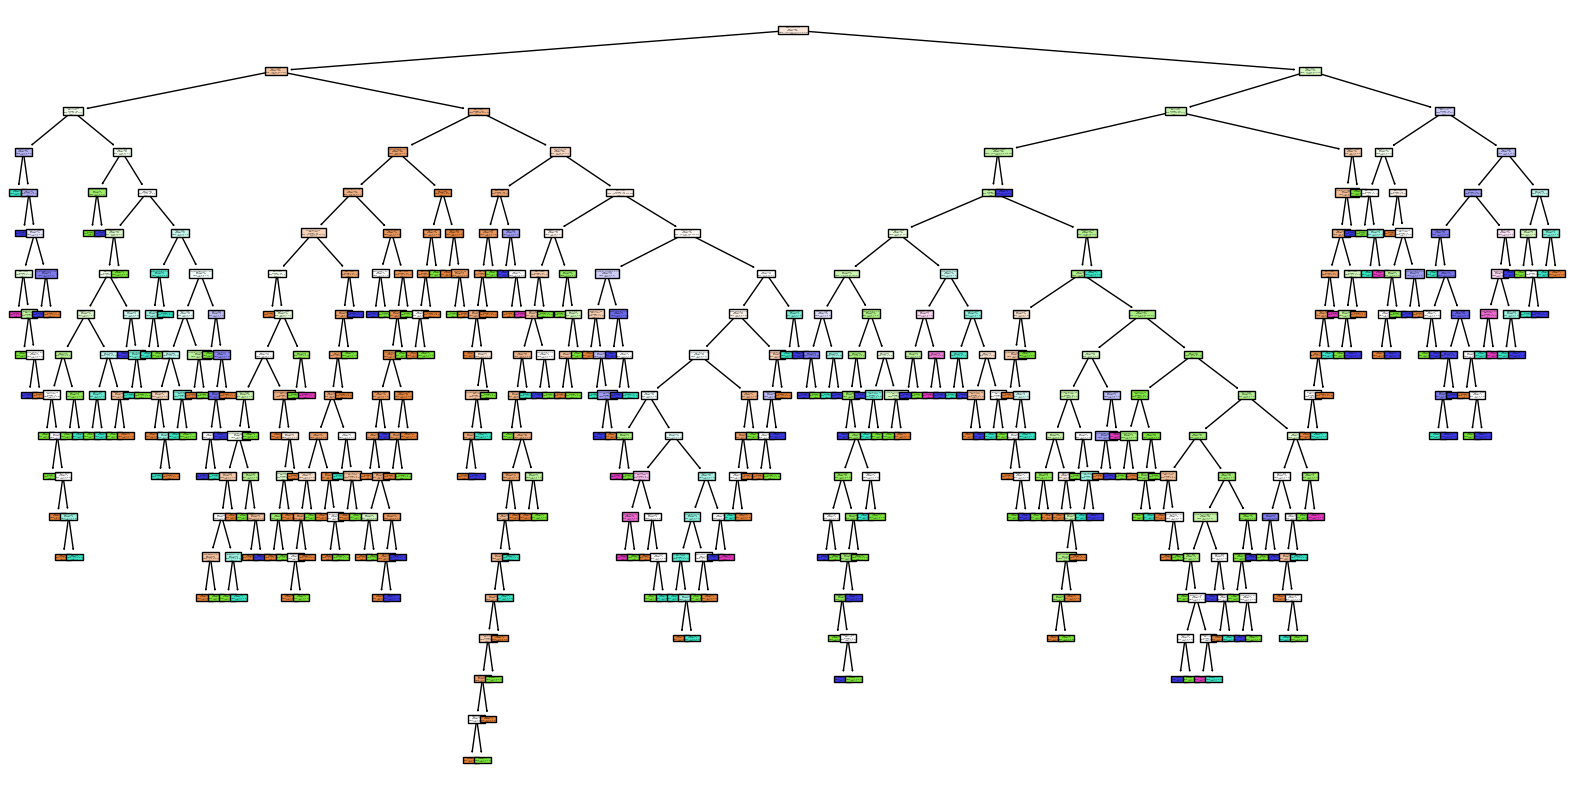

In [ ]:
from sklearn.tree import plot_tree

# Convert class names to strings (if not already)
class_names = [str(cls) for cls in model.classes_]

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()


**Identify important features:**

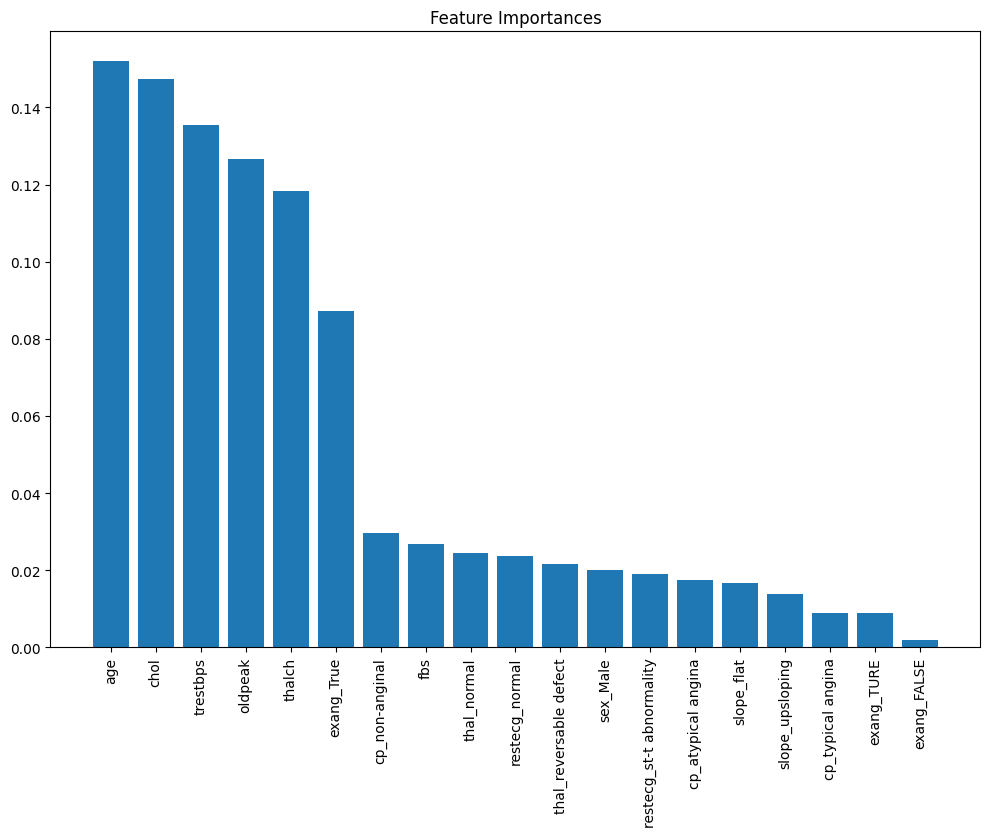

In [ ]:

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")

# Create the bar plot
plt.bar(range(X.shape[1]), importances[indices], align='center')

# Add labels to the x-axis
plt.xticks(range(X.shape[1]), [str(X.columns[i]) for i in indices], rotation=90)

plt.show()


## **Interview Questions:**

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

Decision Tree models have several hyperparameters that can significantly affect their performance. Understanding these hyperparameters is crucial for tuning the model to achieve optimal results. Below are some common hyperparameters and their effects:

**max_depth:**
 This hyperparameter sets the maximum depth of the tree. It controls how deep the tree can grow.    
Effect:          
  Too High: If max_depth is set too high, the tree can become overly complex, leading to overfitting (high variance). The model may perform very well on the training data but poorly on unseen test data.  
Too Low: If max_depth is too low, the tree may be too simple, leading to underfitting (high bias), where the model fails to capture important patterns in the data  
**min_samples_split:**
This specifies the minimum number of samples required to split an internal node.   
Effect:   
Higher Value: A higher value will prevent the tree from splitting until a node contains at least this number of samples, leading to a simpler model (less overfitting).   
Lower Value: A lower value allows the tree to grow deeper, potentially capturing more details but increasing the risk of overfitting.  
**min_samples_leaf:**
This defines the minimum number of samples required to be at a leaf node.  
Effect:   
Higher Value: Larger values create a more generalized tree by preventing nodes from having too few samples, thus reducing overfitting.  
Lower Value: Smaller values allow leaves to represent more specific conditions, which can increase overfitting

**2. What is the difference between the Label encoding and One-hot encoding?**

Label encoding and one-hot encoding are both techniques for converting categorical data into numerical formats that can be used by machine learning algorithms. Here’s a comparison of the two:

**Label Encoding:**
It Converts each category into a unique integer. For example, if you have a column with the categories ['red', 'blue', 'green'], label encoding might assign red as 0, blue as 1, and green as 2.   
Use Case: Often used for ordinal data (where the categories have a meaningful order) or when the model can handle integer values directly.  
Issue: Can introduce ordinal relationships where none exist. For example, the model might interpret 1 (blue) as being somehow "in between" 0 (red) and 2 (green), which might not be appropriate if the categories are nominal (without an inherent order).

**One-Hot Encoding:**
It Creates a new binary column for each category. For example, the categories ['red', 'blue', 'green'] would be converted into three binary columns:  
is_red: [1, 0, 0]    
is_blue: [0, 1, 0]   
is_green: [0, 0, 1]  
Use Case: Preferred for nominal data (categories without a meaningful order) and when the model needs to avoid introducing false relationships between categories.  
Issue: Can lead to a high-dimensional feature space, especially with categorical variables that have many possible values.